# Smart Price: User-Centric Laptop Price Recommendation

# Part 1: Cleaning and Preprocessing the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import LabelEncoder, StandardScaler

#### Dataset Loading

In [2]:
df = pd.read_csv('laptop_price.csv', encoding='latin-1')

#preview
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#### Inspect Dataset

In [3]:
print("Dataset Info:")
df.info()
print("\nMissing Values:\n", df.isnull().sum())

print("Duplicates:", df.duplicated().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB

Missing Values:
 laptop_ID           0
Company             0
Product             0
TypeName            0
Inc

#### Remove Duplicates & Unnecessary Features

In [4]:
df = df.drop_duplicates()
df = df.drop('Product', axis=1)
df = df.drop('laptop_ID', axis=1)

#### Standardize Columns

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.rename(columns={'price_euros': 'price'})
df.head()

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#### Remove 'kg' and Convert 'weight' to Float

In [6]:
df['weight'] = df.weight.str.replace('kg', '').astype(float)
df['ram'] = df.ram.str.replace('GB', '').astype(int)

df.head()

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [7]:
#df.to_csv('cleaned_laptop_data.csv', index=False)

# Part 2: Exploratory Data Analysis

## 1. Distribution of Laptop Prices

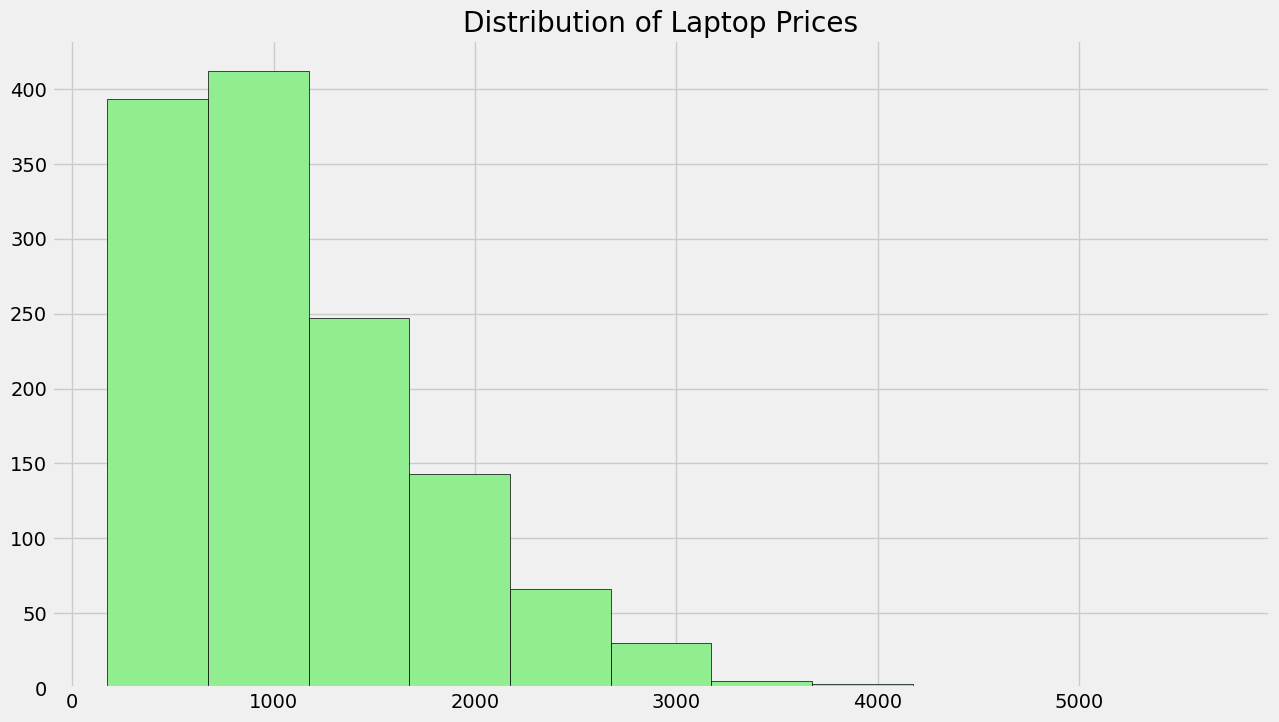

In [8]:
plt.figure(figsize=(14,8))
price_bins = np.arange(min(df.price), max(df.price) + 2, 500)
plt.hist(df.price, bins = price_bins, facecolor='lightgreen', edgecolor='black')
plt.title('Distribution of Laptop Prices')

plt.show()

## 2. Representing the Data Categorically

## Most Popular Brands

In [9]:
brand_count = df.company.value_counts().reset_index()
brand_count.head()

,company,count
0,Dell,297
1,Lenovo,297
2,HP,274
3,Asus,158
4,Acer,103


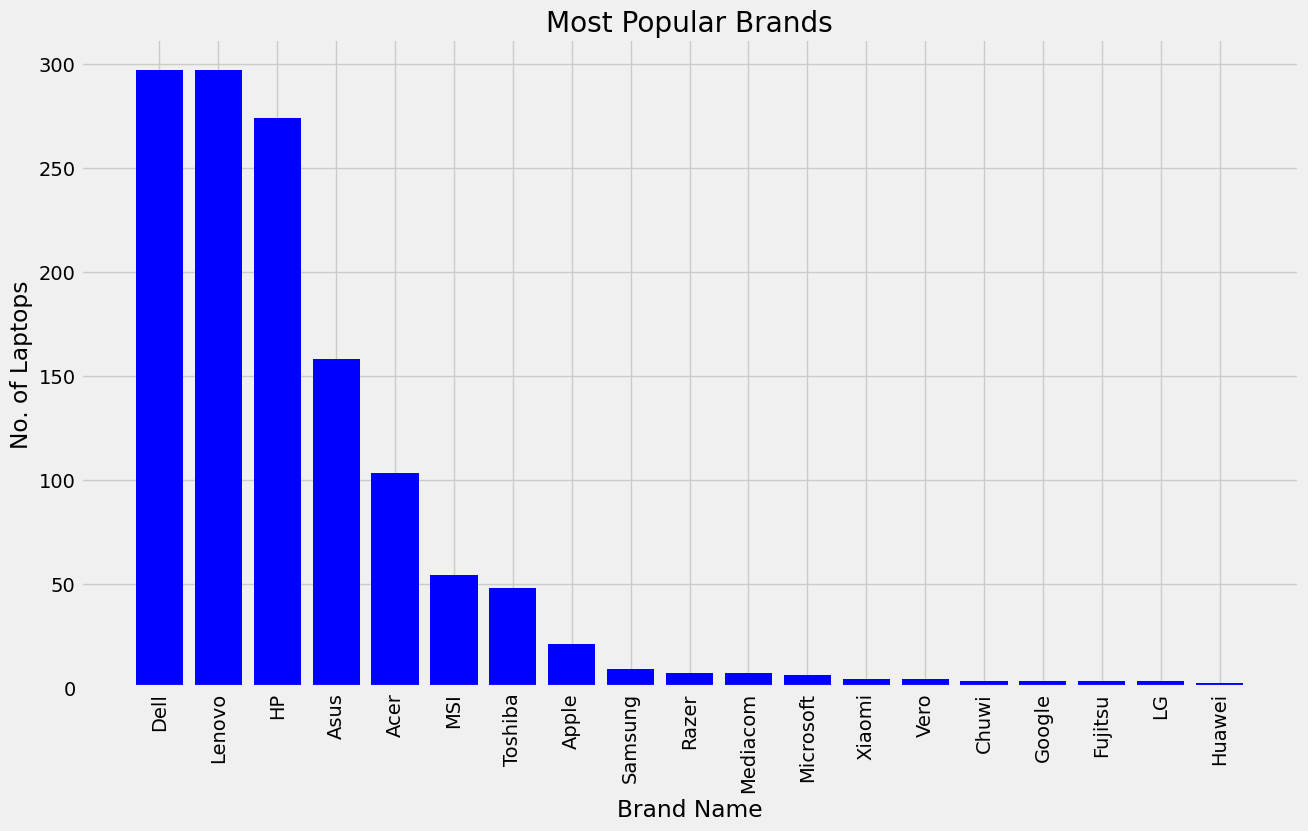

In [10]:
plt.figure(figsize=(14,8))
plt.bar(brand_count['company'], brand_count['count'], color='blue')
plt.xlabel('Brand Name')
plt.ylabel('No. of Laptops')
plt.title('Most Popular Brands')
plt.xticks(rotation='vertical')
plt.show()

## Prices Across Each Brand

In [11]:
avg_brands = df.groupby('company')['price'].mean().reset_index()
avg_brands.head()

,company,price
0,Acer,626.775825
1,Apple,1564.198571
2,Asus,1104.169367
3,Chuwi,314.296667
4,Dell,1186.068990


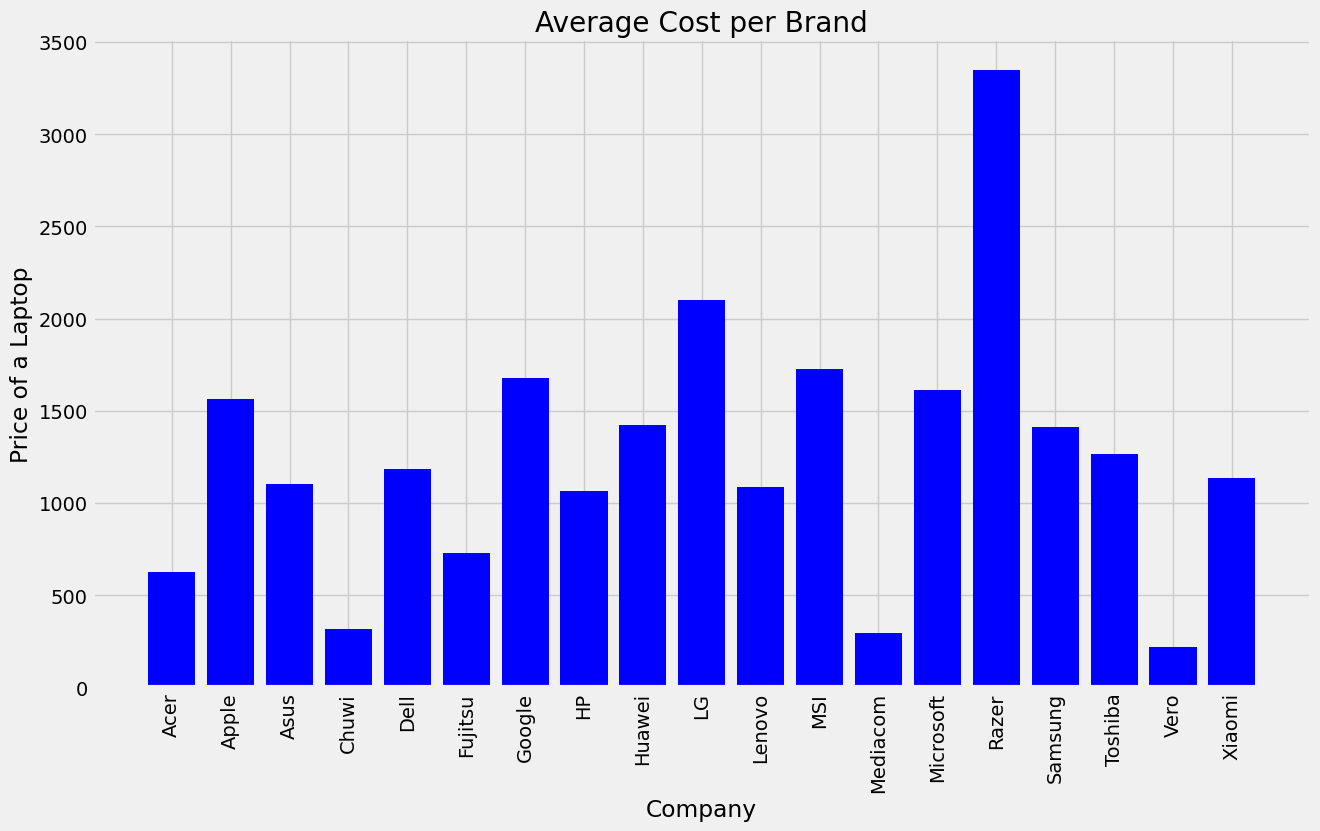

In [12]:
plt.figure(figsize=(14,8))
plt.bar(avg_brands['company'], avg_brands['price'], color='blue')
plt.xlabel('Company')
plt.ylabel('Price of a Laptop')
plt.title('Average Cost per Brand')
plt.xticks(rotation='vertical')
plt.show()

## Laptop Types

In [13]:
types_count = df.typename.value_counts().reset_index()
types_count

,typename,count
0,Notebook,727
1,Gaming,205
2,Ultrabook,196
3,2 in 1 Convertible,121
4,Workstation,29
5,Netbook,25


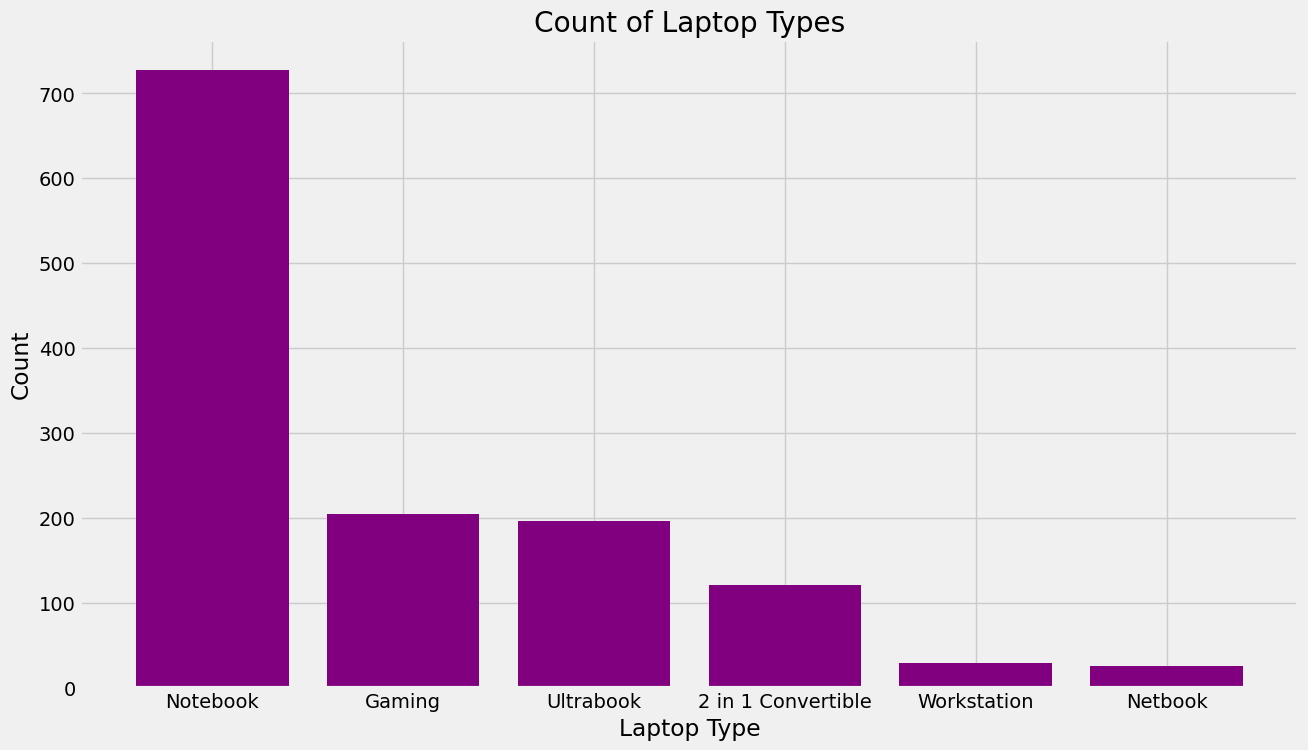

In [14]:
plt.figure(figsize=(14,8))
plt.bar(types_count['typename'], types_count['count'], color='purple')
plt.xlabel('Laptop Type')
plt.ylabel('Count')
plt.title('Count of Laptop Types')
plt.show()

In [15]:
avg_types = df.groupby('typename')['price'].mean().reset_index()
avg_types

,typename,price
0,2 in 1 Convertible,1282.401653
1,Gaming,1731.380634
2,Netbook,636.232000
3,Notebook,782.078624
4,Ultrabook,1548.230357
5,Workstation,2280.358966


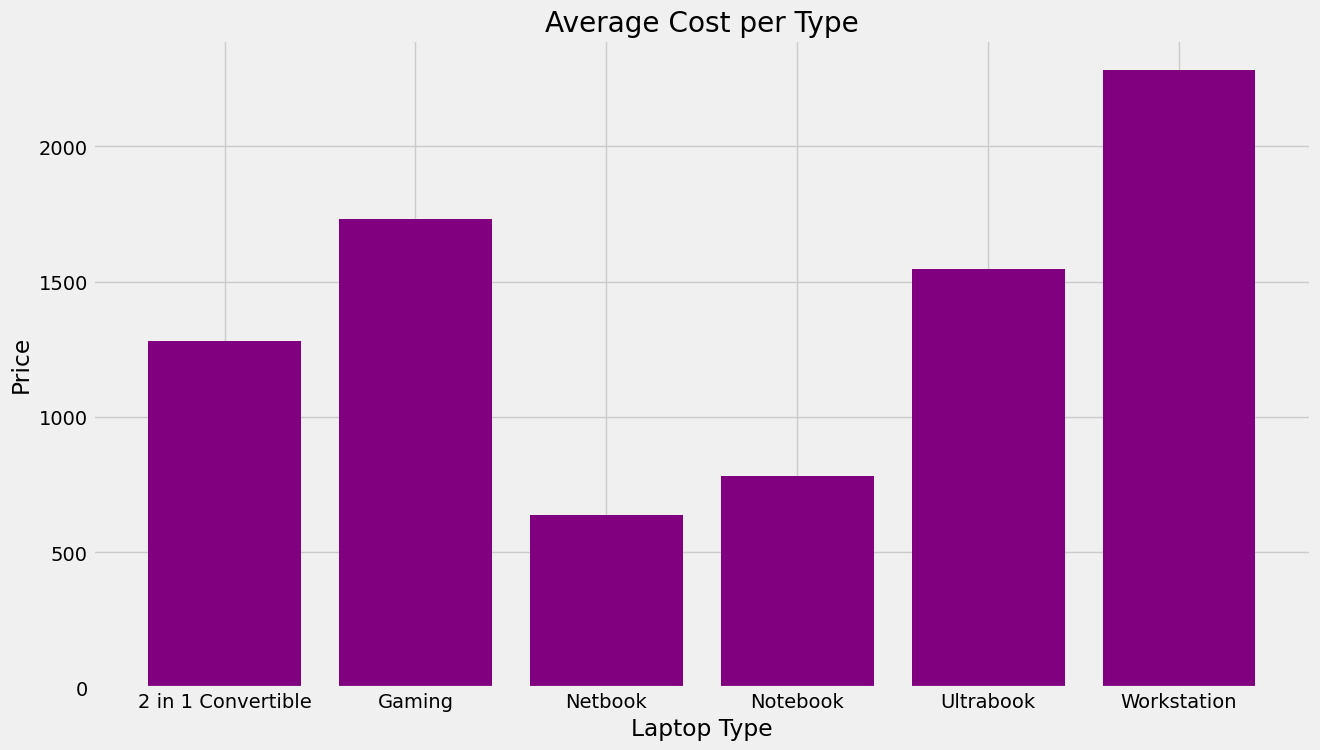

In [16]:
plt.figure(figsize=(14,8))
plt.bar(avg_types['typename'], avg_types['price'], color='purple')
plt.xlabel('Laptop Type')
plt.ylabel('Price')
plt.title('Average Cost per Type')
plt.show()

In [17]:
os_count = df.opsys.value_counts().reset_index()
os_count

,opsys,count
0,Windows 10,1072
1,No OS,66
2,Linux,62
3,Windows 7,45
4,Chrome OS,27
5,macOS,13
6,Mac OS X,8
7,Windows 10 S,8
8,Android,2


## Operating Sytems & RAM

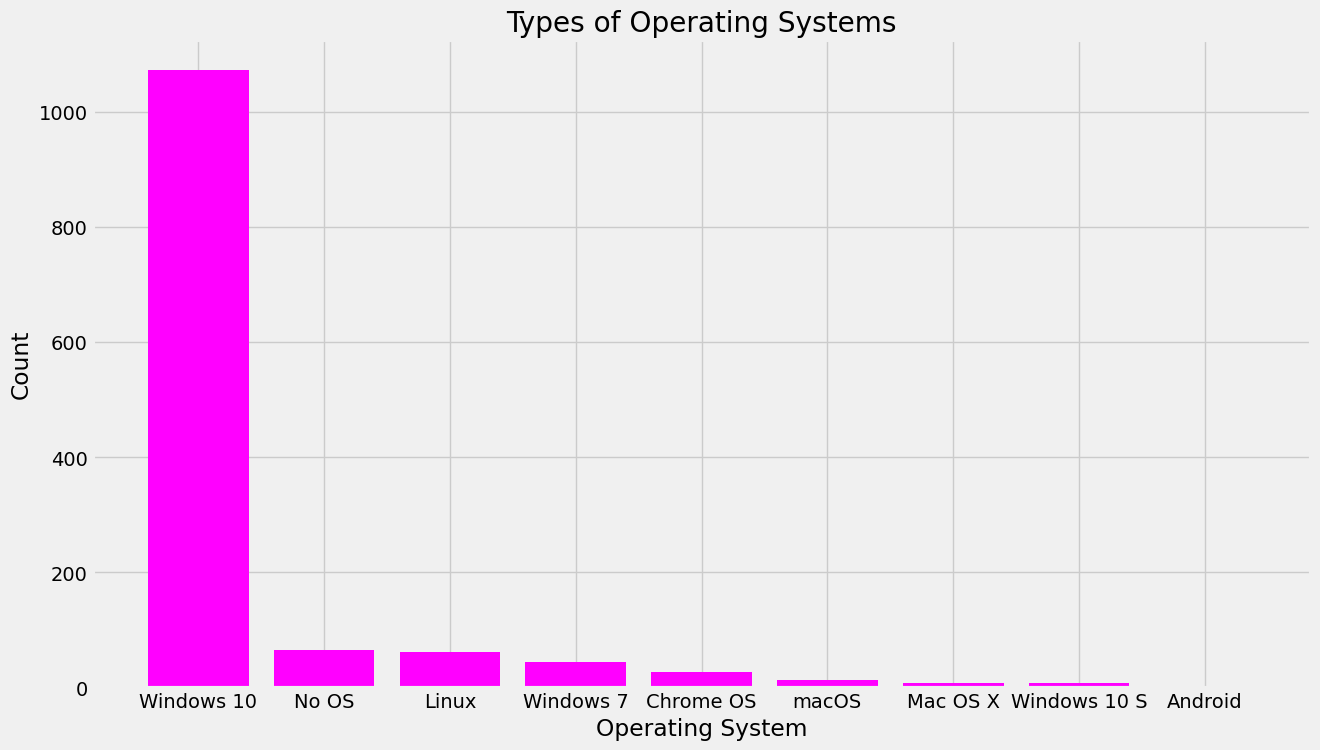

In [18]:
plt.figure(figsize=(14,8))
plt.bar(os_count['opsys'], os_count['count'], color='magenta')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.title('Types of Operating Systems')
plt.show()

In [19]:
ram_count = df.ram.value_counts().reset_index()
ram_count['ram'] = ram_count['ram'].astype(str)
ram_count

,ram,count
0,8,619
1,4,375
2,16,200
3,6,41
4,12,25
5,2,22
6,32,17
7,24,3
8,64,1


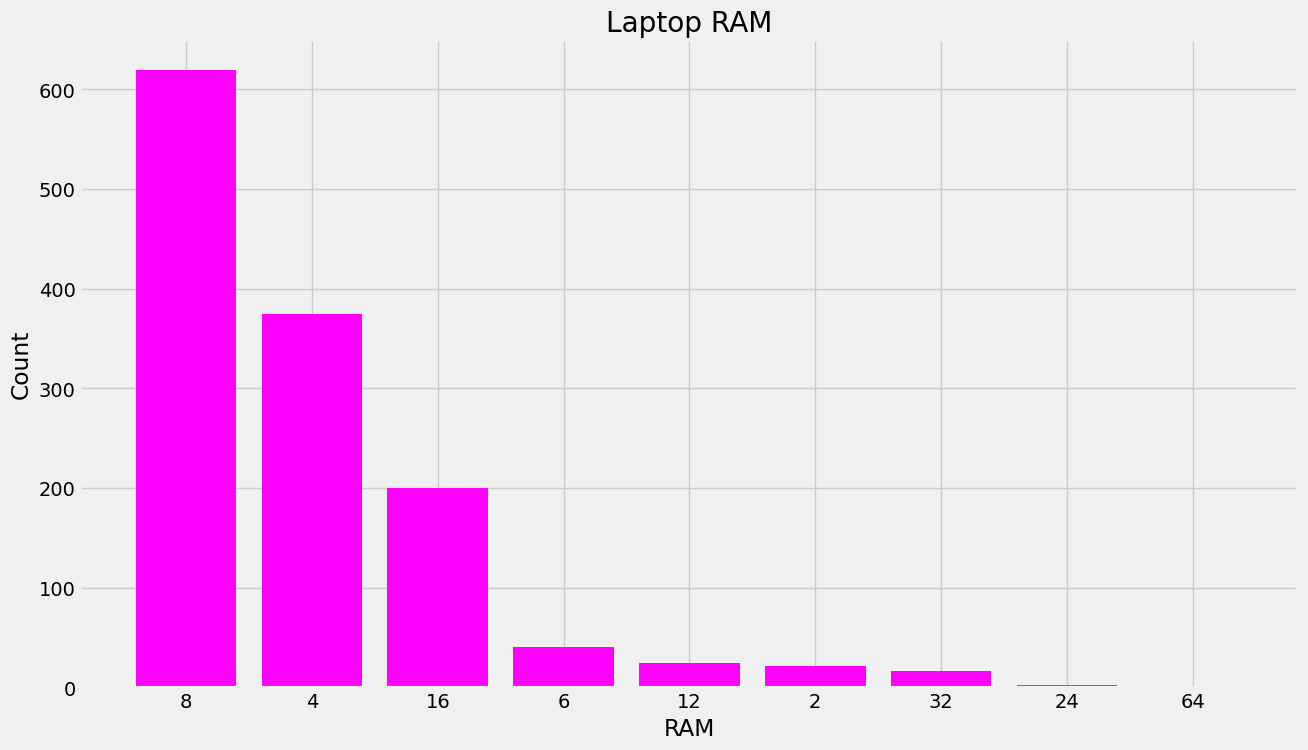

In [20]:
plt.figure(figsize=(14,8))
plt.bar(ram_count['ram'], ram_count['count'], color='magenta')
plt.xlabel('RAM')
plt.ylabel('Count')
plt.title('Laptop RAM')
plt.show()

## 3. Representing the Data Numerically

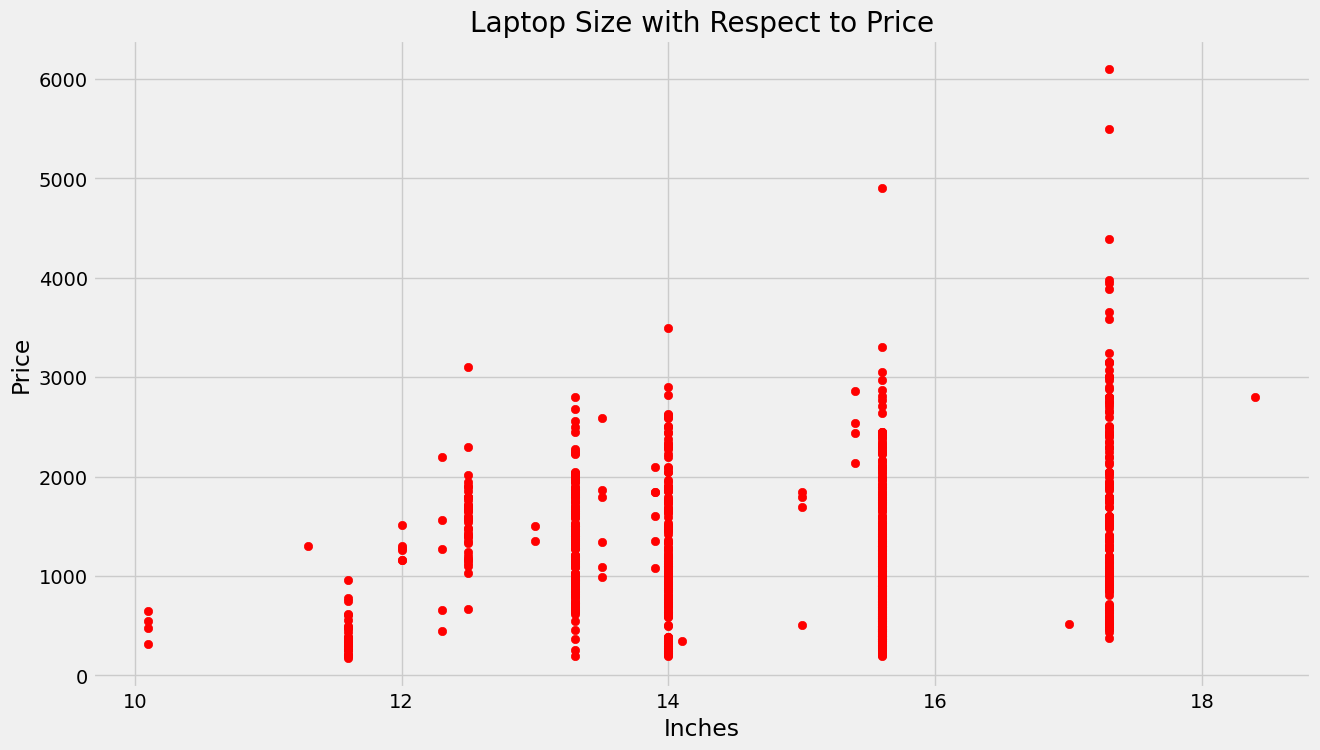

In [21]:
plt.figure(figsize=(14,8))
plt.scatter(df.inches, df.price, color='red')
plt.xlabel('Inches')
plt.ylabel('Price')
plt.title('Laptop Size with Respect to Price')
plt.show()

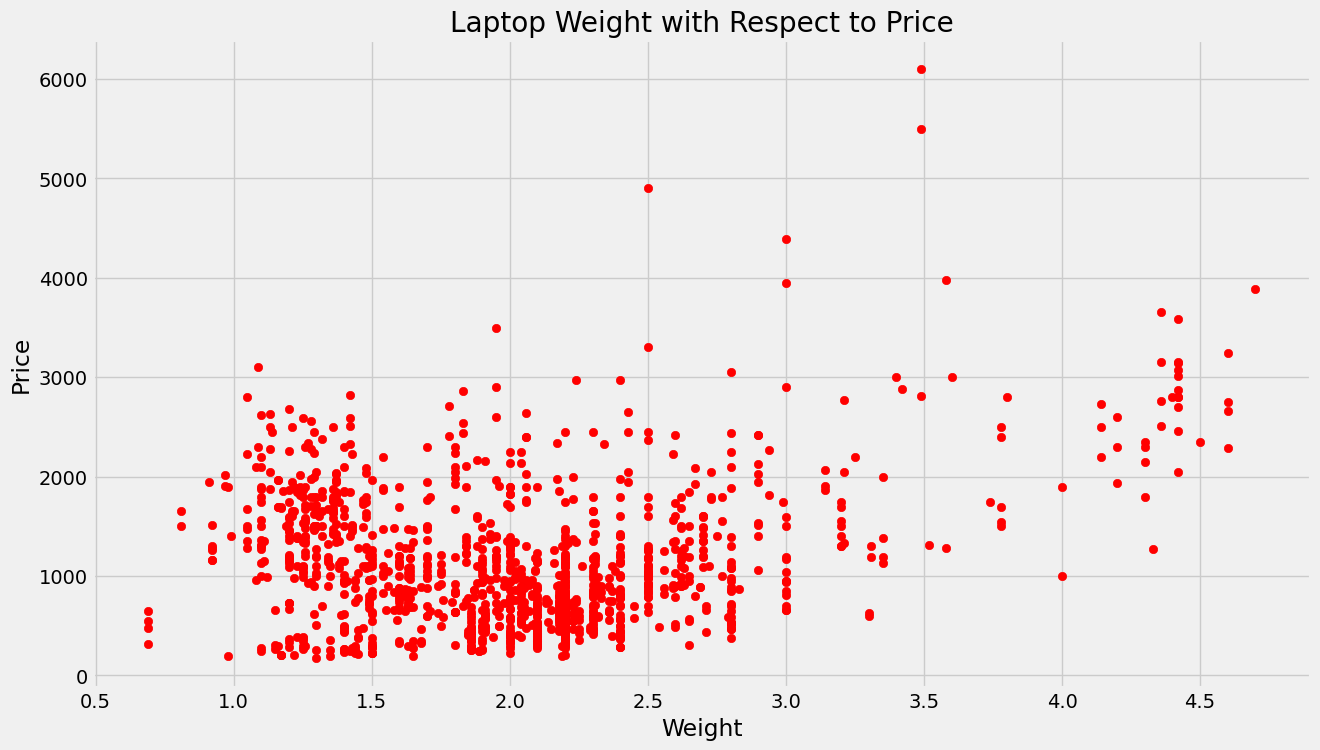

In [22]:
plt.figure(figsize=(14,8))
plt.scatter(df.weight, df.price, color='red')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Laptop Weight with Respect to Price')
plt.show()

# Part 3: Feature Engineering

## Making the Company Names Categorical

In [23]:
df = df.join(pd.get_dummies(df.company, dtype=int))
df = df.drop('company', axis=1)
df.head()

,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,...,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,...,0,0,0,0,0,0,0,0,0,0
1,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,...,0,0,0,0,0,0,0,0,0,0
2,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,...,0,0,0,0,0,0,0,0,0,0
3,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,...,0,0,0,0,0,0,0,0,0,0
4,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,...,0,0,0,0,0,0,0,0,0,0


## Making the Laptop Types Categorical

In [24]:
df = df.join(pd.get_dummies(df.typename, dtype=int))
df = df.drop('typename', axis=1)
df.head()

,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,Acer,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,...,0,0,0,0,0,0,0,0,1,0
1,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,...,0,0,0,0,0,0,0,0,1,0
2,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,...,0,0,0,0,0,0,0,1,0,0
3,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,...,0,0,0,0,0,0,0,0,1,0
4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,...,0,0,0,0,0,0,0,0,1,0


## Creating Features: 'Screen Width' & 'Screen Height'

In [25]:
split_res = df.screenresolution.str.split(' ')
split_res = [item[-1] for item in split_res]
split_res = [item.split('x') for item in split_res]

df['screen_width'] = [item[0] for item in split_res]
df['screen_height'] = [item[1] for item in split_res]

df['screen_width'] = df.screen_width.astype(int)
df['screen_height'] = df.screen_height.astype(int)
df = df.drop('screenresolution', axis=1)

df.head()

,inches,cpu,ram,memory,gpu,opsys,weight,price,Acer,Apple,...,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,screen_width,screen_height
0,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,...,0,0,0,0,0,0,1,0,2560,1600
1,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,1,...,0,0,0,0,0,0,1,0,1440,900
2,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,...,0,0,0,0,0,1,0,0,1920,1080
3,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,...,0,0,0,0,0,0,1,0,2880,1800
4,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,...,0,0,0,0,0,0,1,0,2560,1600


## Creating Features: 'CPU Brand' & 'CPU Frequency'

In [26]:
split_cpu = df.cpu.str.split(' ')
df['cpu_brand'] = [item[0] for item in split_cpu]
df['cpu_frequency'] = [item[-1] for item in split_cpu]
df['cpu_frequency'] = df.cpu_frequency.str.replace('GHz','').astype(float)
df = df.drop('cpu', axis=1)

df.head()

,inches,ram,memory,gpu,opsys,weight,price,Acer,Apple,Asus,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,screen_width,screen_height,cpu_brand,cpu_frequency
0,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,0,...,0,0,0,0,1,0,2560,1600,Intel,2.3
1,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,1,0,...,0,0,0,0,1,0,1440,900,Intel,1.8
2,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5
3,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,0,...,0,0,0,0,1,0,2880,1800,Intel,2.7
4,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,0,...,0,0,0,0,1,0,2560,1600,Intel,3.1


## Creating Feature: 'GPU Brand'

In [27]:
split_gpu = df.gpu.str.split(' ')
df['gpu_brand'] = [item[0] for item in split_gpu]
df = df.drop('gpu', axis=1)

df.head()

,inches,ram,memory,opsys,weight,price,Acer,Apple,Asus,Chuwi,...,Gaming,Netbook,Notebook,Ultrabook,Workstation,screen_width,screen_height,cpu_brand,cpu_frequency,gpu_brand
0,13.3,8,128GB SSD,macOS,1.37,1339.69,0,1,0,0,...,0,0,0,1,0,2560,1600,Intel,2.3,Intel
1,13.3,8,128GB Flash Storage,macOS,1.34,898.94,0,1,0,0,...,0,0,0,1,0,1440,900,Intel,1.8,Intel
2,15.6,8,256GB SSD,No OS,1.86,575.00,0,0,0,0,...,0,0,1,0,0,1920,1080,Intel,2.5,Intel
3,15.4,16,512GB SSD,macOS,1.83,2537.45,0,1,0,0,...,0,0,0,1,0,2880,1800,Intel,2.7,AMD
4,13.3,8,256GB SSD,macOS,1.37,1803.60,0,1,0,0,...,0,0,0,1,0,2560,1600,Intel,3.1,Intel


## Creating Features: 'Memory Type' & 'Memory Amount'

In [28]:
memory_split = df.memory.str.split(' ')
df['memory_type'] = [item[1] for item in memory_split]
df['memory_amount'] = [item[0] for item in memory_split]
df = df.drop('memory', axis=1)

df.head()

,inches,ram,opsys,weight,price,Acer,Apple,Asus,Chuwi,Dell,...,Notebook,Ultrabook,Workstation,screen_width,screen_height,cpu_brand,cpu_frequency,gpu_brand,memory_type,memory_amount
0,13.3,8,macOS,1.37,1339.69,0,1,0,0,0,...,0,1,0,2560,1600,Intel,2.3,Intel,SSD,128GB
1,13.3,8,macOS,1.34,898.94,0,1,0,0,0,...,0,1,0,1440,900,Intel,1.8,Intel,Flash,128GB
2,15.6,8,No OS,1.86,575.00,0,0,0,0,0,...,1,0,0,1920,1080,Intel,2.5,Intel,SSD,256GB
3,15.4,16,macOS,1.83,2537.45,0,1,0,0,0,...,0,1,0,2880,1800,Intel,2.7,AMD,SSD,512GB
4,13.3,8,macOS,1.37,1803.60,0,1,0,0,0,...,0,1,0,2560,1600,Intel,3.1,Intel,SSD,256GB


## Converting All Memory Values to GB and Datatypes to Integers

In [29]:
i = 0
for value in df.memory_amount:
    if 'TB' in value:
        if '1.0' in value:
             value = value.replace('1.0', '1')
             value = (int(value.replace('TB', '')))*1000
        else:
            value = (int(value.replace('TB', '')))*1000

    elif 'GB' in value:
        value = int(value.replace('GB', ''))

    df.loc[i, "memory_amount"] = value
    i += 1

df.memory_amount.tail()

1298     128
1299     512
1300      64
1301    1000
1302     500
Name: memory_amount, dtype: object

## Dropping Irrelevant Features

In [30]:
df.opsys.value_counts()

opsys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [31]:
df = df.drop('opsys', axis=1)
df.head()

,inches,ram,weight,price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Notebook,Ultrabook,Workstation,screen_width,screen_height,cpu_brand,cpu_frequency,gpu_brand,memory_type,memory_amount
0,13.3,8,1.37,1339.69,0,1,0,0,0,0,...,0,1,0,2560,1600,Intel,2.3,Intel,SSD,128
1,13.3,8,1.34,898.94,0,1,0,0,0,0,...,0,1,0,1440,900,Intel,1.8,Intel,Flash,128
2,15.6,8,1.86,575.00,0,0,0,0,0,0,...,1,0,0,1920,1080,Intel,2.5,Intel,SSD,256
3,15.4,16,1.83,2537.45,0,1,0,0,0,0,...,0,1,0,2880,1800,Intel,2.7,AMD,SSD,512
4,13.3,8,1.37,1803.60,0,1,0,0,0,0,...,0,1,0,2560,1600,Intel,3.1,Intel,SSD,256


In [32]:
df.shape

(1303, 36)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inches              1303 non-null   float64
 1   ram                 1303 non-null   int32  
 2   weight              1303 non-null   float64
 3   price               1303 non-null   float64
 4   Acer                1303 non-null   int32  
 5   Apple               1303 non-null   int32  
 6   Asus                1303 non-null   int32  
 7   Chuwi               1303 non-null   int32  
 8   Dell                1303 non-null   int32  
 9   Fujitsu             1303 non-null   int32  
 10  Google              1303 non-null   int32  
 11  HP                  1303 non-null   int32  
 12  Huawei              1303 non-null   int32  
 13  LG                  1303 non-null   int32  
 14  Lenovo              1303 non-null   int32  
 15  MSI                 1303 non-null   int32  
 16  Mediac

# **Extract numerical and categorical features from memory**

In [34]:
df['memory_amount'] = df['memory_amount'].astype(int)
memory_type_dummies = pd.get_dummies(df['memory_type'], prefix='memory_type', dtype=int)
df = pd.concat([df, memory_type_dummies], axis=1).drop('memory_type', axis=1)

In [35]:
df['price_log'] = np.log1p(df['price'])  # Use log(price + 1)

In [36]:
df = pd.get_dummies(df, columns=['cpu_brand', 'gpu_brand'], dtype=int)

In [37]:
df

,inches,ram,weight,price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,memory_type_Hybrid,memory_type_SSD,price_log,cpu_brand_AMD,cpu_brand_Intel,cpu_brand_Samsung,gpu_brand_AMD,gpu_brand_ARM,gpu_brand_Intel,gpu_brand_Nvidia
0,13.3,8,1.37,1339.69,0,1,0,0,0,0,...,0,1,7.200940,0,1,0,0,0,1,0
1,13.3,8,1.34,898.94,0,1,0,0,0,0,...,0,0,6.802328,0,1,0,0,0,1,0
2,15.6,8,1.86,575.00,0,0,0,0,0,0,...,0,1,6.356108,0,1,0,0,0,1,0
3,15.4,16,1.83,2537.45,0,1,0,0,0,0,...,0,1,7.839309,0,1,0,1,0,0,0
4,13.3,8,1.37,1803.60,0,1,0,0,0,0,...,0,1,7.498094,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,1.80,638.00,0,0,0,0,0,0,...,0,1,6.459904,0,1,0,0,0,1,0
1299,13.3,16,1.30,1499.00,0,0,0,0,0,0,...,0,1,7.313220,0,1,0,0,0,1,0
1300,14.0,2,1.50,229.00,0,0,0,0,0,0,...,0,0,5.438079,0,1,0,0,0,1,0
1301,15.6,6,2.19,764.00,0,0,0,0,0,0,...,0,0,6.639876,0,1,0,1,0,0,0


# **Heatmap**

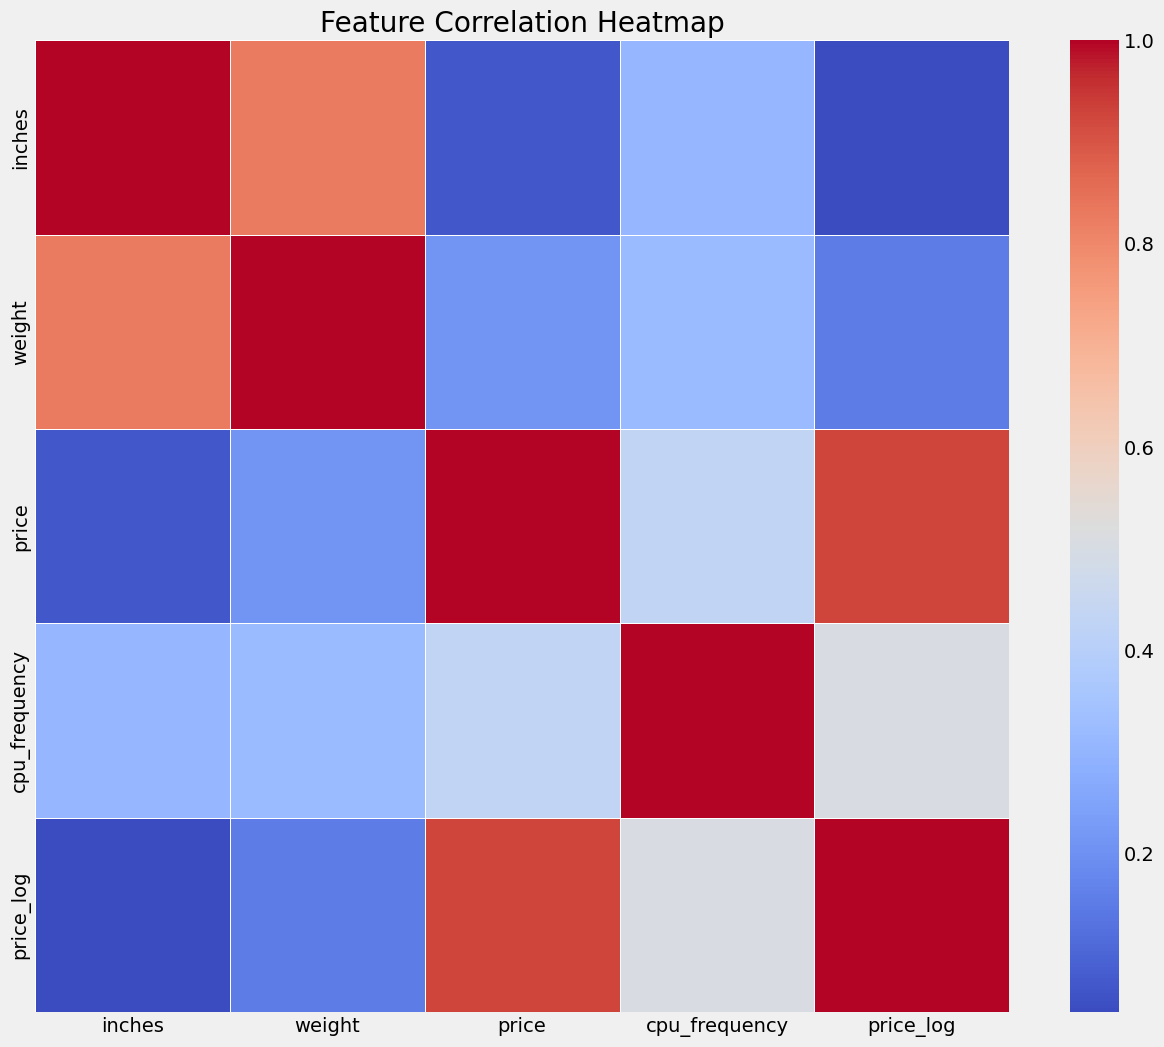

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
plt.figure(figsize=(14, 12))
corr_matrix = numeric_df.corr()

# Heatmap visualization
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


# **Model Building**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df.drop(['price', 'price_log'], axis=1)  # Features
y = df['price_log']  # Log-transformed target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb


**Updated Model Evaluation with Regression Metrics**

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluation function for regression models
def evaluate_model(model, X_test, y_test):
    # Predictions
    predictions = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Print metrics
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2 Score: {r2:.4f}")

    # Return all metrics as a dictionary
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}


In [42]:
from sklearn.linear_model import LinearRegression

# Define and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear Regression Performance:")
lr_metrics = evaluate_model(lr_model, X_test, y_test)


Linear Regression Performance:
MSE: 0.0723, RMSE: 0.2690, MAE: 0.2204, R2 Score: 0.7954


In [43]:
# Define and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)
print("Decision Tree Performance:")
dt_metrics = evaluate_model(dt_model, X_test, y_test)


Decision Tree Performance:
MSE: 0.0821, RMSE: 0.2866, MAE: 0.2156, R2 Score: 0.7677


In [44]:
from sklearn.ensemble import RandomForestRegressor

# Define and train Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)
print("Random Forest Performance:")
rf_metrics = evaluate_model(rf_model, X_test, y_test)


Random Forest Performance:
MSE: 0.0528, RMSE: 0.2297, MAE: 0.1762, R2 Score: 0.8508


In [45]:
import xgboost as xgb

# Define and train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
print("XGBoost Performance:")
xgb_metrics = evaluate_model(xgb_model, X_test, y_test)


XGBoost Performance:
MSE: 0.0497, RMSE: 0.2230, MAE: 0.1675, R2 Score: 0.8594


In [46]:
from sklearn.svm import SVR

# Define and train Support Vector Regressor
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

print("Support Vector Regressor Performance:")
svr_metrics = evaluate_model(svr_model, X_test, y_test)


Support Vector Regressor Performance:
MSE: 0.0547, RMSE: 0.2339, MAE: 0.1849, R2 Score: 0.8452


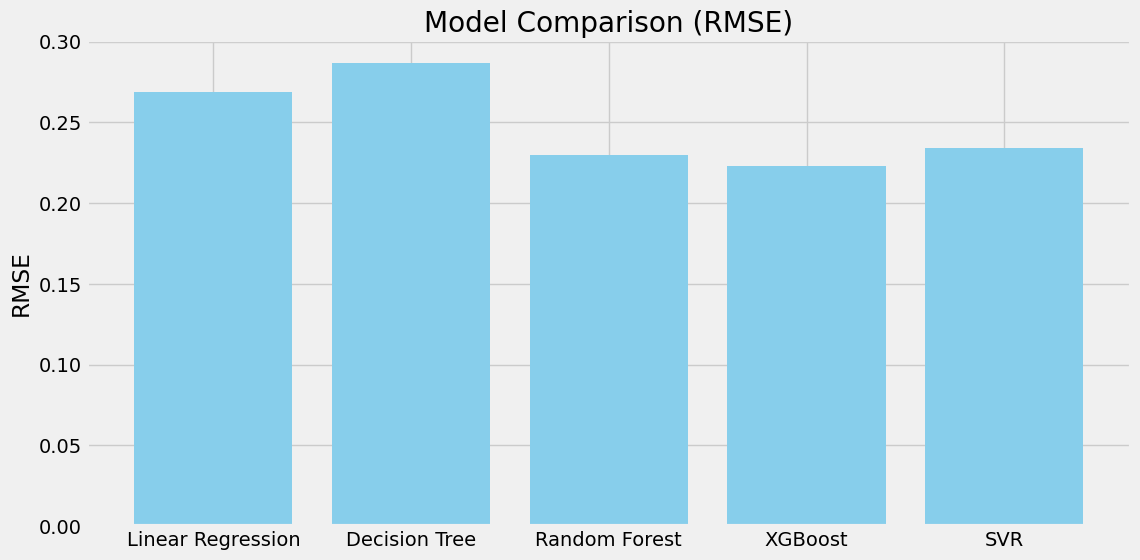

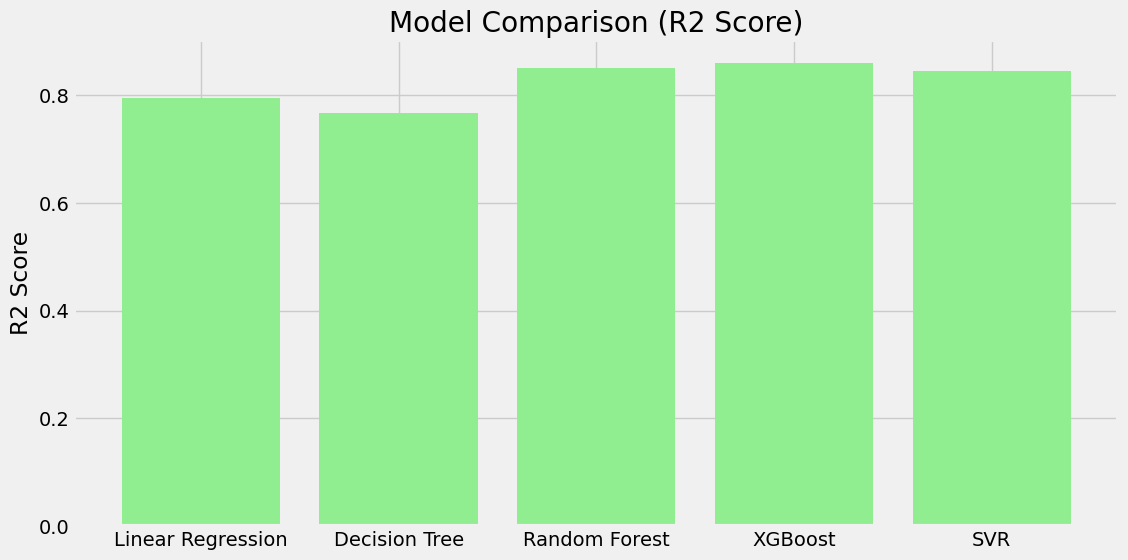

In [47]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVR']
rmse_scores = [
    np.sqrt(mean_squared_error(y_test, lr_model.predict(X_test))),
    np.sqrt(mean_squared_error(y_test, dt_model.predict(X_test))),
    np.sqrt(mean_squared_error(y_test, rf_model.predict(X_test))),
    np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test))),
    np.sqrt(mean_squared_error(y_test, svr_model.predict(X_test))),
]

r2_scores = [
    r2_score(y_test, lr_model.predict(X_test)),
    r2_score(y_test, dt_model.predict(X_test)),
    r2_score(y_test, rf_model.predict(X_test)),
    r2_score(y_test, xgb_model.predict(X_test)),
    r2_score(y_test, svr_model.predict(X_test)),
]

# Bar plot for RMSE
plt.figure(figsize=(12, 6))
plt.bar(models, rmse_scores, color='skyblue')
plt.title('Model Comparison (RMSE)')
plt.ylabel('RMSE')
plt.show()

# Bar plot for R2 Score
plt.figure(figsize=(12, 6))
plt.bar(models, r2_scores, color='lightgreen')
plt.title('Model Comparison (R2 Score)')
plt.ylabel('R2 Score')
plt.show()


In [48]:
import pandas as pd

# Create a dictionary of model metrics
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVR'],
    'MSE': [lr_metrics['MSE'], dt_metrics['MSE'], rf_metrics['MSE'], xgb_metrics['MSE'], svr_metrics['MSE']],
    'RMSE': [lr_metrics['RMSE'], dt_metrics['RMSE'], rf_metrics['RMSE'], xgb_metrics['RMSE'], svr_metrics['RMSE']],
    'MAE': [lr_metrics['MAE'], dt_metrics['MAE'], rf_metrics['MAE'], xgb_metrics['MAE'], svr_metrics['MAE']],
    'R2': [lr_metrics['R2'], dt_metrics['R2'], rf_metrics['R2'], xgb_metrics['R2'], svr_metrics['R2']]
}

# Convert to a DataFrame
metrics_df = pd.DataFrame(results)

# Display the DataFrame
print(metrics_df)


               Model       MSE      RMSE       MAE        R2
0  Linear Regression  0.072342  0.268965  0.220435  0.795363
1      Decision Tree  0.082116  0.286559  0.215564  0.767716
2      Random Forest  0.052760  0.229696  0.176172  0.850755
3            XGBoost  0.049713  0.222964  0.167545  0.859375
4                SVR  0.054710  0.233902  0.184936  0.845240


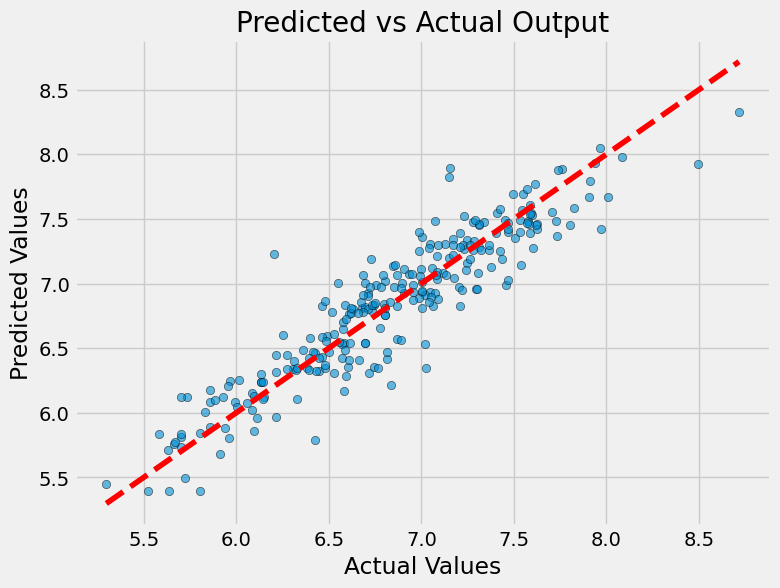

In [49]:
def plot_predicted_vs_actual(model, X_test, y_test, title):
    predictions = model.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.6, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Ideal line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.show()

plot_predicted_vs_actual(rf_model, X_test, y_test, "Predicted vs Actual Output")


# **Results**

**Predicted vs Actual Graph**

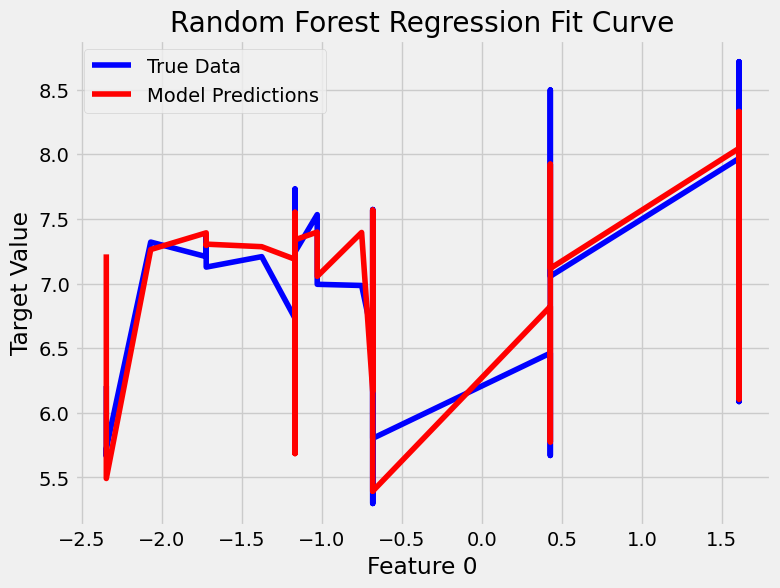

In [50]:
def plot_model_fit_curve(model, X_test, y_test, feature_idx=0, title="Model Fit Curve"):
    # Sort data by the selected feature for smooth curve
    sorted_idx = np.argsort(X_test[:, feature_idx])
    sorted_X = X_test[sorted_idx]
    sorted_y_test = y_test.iloc[sorted_idx]
    predictions = model.predict(sorted_X)

    # Plot true values and predictions
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_X[:, feature_idx], sorted_y_test, label='True Data', color='blue')
    plt.plot(sorted_X[:, feature_idx], predictions, label='Model Predictions', color='red')
    plt.xlabel(f'Feature {feature_idx}')
    plt.ylabel('Target Value')
    plt.title(title)
    plt.legend()
    plt.show()

plot_model_fit_curve(rf_model, X_test, y_test, feature_idx=0, title="Random Forest Regression Fit Curve")


### **Implementation**

In [51]:
# Example Laptop Specifications for Prediction
sample_laptop = {
    'inches': 15.6,       # Screen size in inches
    'ram': 8,             # RAM in GB
    'weight': 1.8,        # Weight in kg
    'cpu_brand_Intel': 1, # Assuming 'Intel' CPU brand (dummy variable)
    'cpu_brand_AMD': 0,   # Assuming not 'AMD' CPU brand
    'gpu_brand_Intel': 1, # Assuming 'Intel' GPU brand (dummy variable)
    'gpu_brand_NVIDIA': 0,# Assuming not 'NVIDIA' GPU brand
    'memory_amount': 256, # Memory amount in GB
    'memory_type_SSD': 1, # Assuming SSD memory type (dummy variable)
    'memory_type_HDD': 0  # Assuming not HDD memory type
}


sample_df = pd.DataFrame([sample_laptop])

# Align sample with training data
sample_df = sample_df.reindex(columns=X.columns, fill_value=0)

# Make Prediction
predicted_price_log = rf_model.predict(sample_df)[0]
predicted_price = np.expm1(predicted_price_log)  

print(f"The predicted price of the laptop is: €{predicted_price:.2f}")


The predicted price of the laptop is: €1759.27


c:\Users\namu_\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [52]:
# Predicted and actual values (replace y_pred and y_test with your actual variables)
y_pred = rf_model.predict(X_test)  
y_test = y_test 

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# R-Squared Score
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.18
Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.23
R-Squared (R²): 0.85
